## Dataset
> Description: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

In [2]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Data Wrangling

### General

In [4]:
# Load and read the dataset from a CSV file
file_path = 'tmdb-movies.csv'
df = pd.read_csv(file_path)

# Print out the few lines to inspect the datatypes and look for instances of missing or errant data.
df.head(30)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [13]:
df.shape

(10866, 11)

In [5]:
df.columns # checking for all the columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
df.info() #checking the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
df.describe() #view the Stats of columns

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data cleaning

In [11]:
# dropping of the unwanted columns for the analysis

df.drop(columns=['id', 'imdb_id',
       'cast', 'homepage', 'tagline', 'keywords', 'overview','release_date','production_companies','vote_count'],
        inplace=True)


In [14]:
df[df.duplicated()] # checking if any dulipcate rows are present in data

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,5.0,2010,30000000.0,967000.0


In [15]:
df.drop(index=2090,inplace=True) #dropping the duplicate row

In [16]:
df[df.duplicated()] #checking if any duplicates exist

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj


In [17]:
df.duplicated().sum()

0

In [18]:
df # viewing the remaining dataset after cleaning

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,5.4,1966,0.000000e+00,0.000000e+00


In [19]:
df.shape

(10865, 11)

In [20]:
df.isnull().sum() # checking for missing values or nulls

popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [24]:
# By investigating the data, for analysis its better to drop certain null records

In [21]:
df['genres'].dropna(how='any',inplace=True) # dropping null values in genres column 

In [22]:
df.dropna(how='any',inplace=True) # dropping the remaining null valued rows

In [23]:
df.isnull().sum() #checking if still the null values exist

popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [25]:
df.info() # checking for cleaned data info to evaluate the datatypes

<class 'pandas.core.frame.DataFrame'>
Index: 10800 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10800 non-null  float64
 1   budget          10800 non-null  int64  
 2   revenue         10800 non-null  int64  
 3   original_title  10800 non-null  object 
 4   director        10800 non-null  object 
 5   runtime         10800 non-null  int64  
 6   genres          10800 non-null  object 
 7   vote_average    10800 non-null  float64
 8   release_year    10800 non-null  int64  
 9   budget_adj      10800 non-null  float64
 10  revenue_adj     10800 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1012.5+ KB


In [26]:
# Dropping of rows with 0 values because they are irrevelent to  our findings
df=df[df.budget != 0]

In [27]:
df=df[df.revenue != 0]

In [28]:
df=df[(df.runtime != 0)]

In [31]:
#Display the cleaned Data
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


In [33]:
# will create a new column for finding profits.
df['profit'] = df['revenue'] - df['budget']

In [34]:
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09,1363528810


In [104]:
# getting the descriptive statistics of the required colums (budget and popularity)
df['budget'].describe() 

count    3.853000e+03
mean     3.721227e+07
std      4.221035e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [102]:
df['popularity'].describe()

count    3853.000000
mean        1.191825
std         1.475258
min         0.001117
25%         0.462609
50%         0.797723
75%         1.368403
max        32.985763
Name: popularity, dtype: float64

In [103]:
df['runtime'].describe()

count    3853.000000
mean      109.208928
std        19.912913
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

## Exploratory Data Analysis

#### Question & ANS

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>],
       [<AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>]],
      dtype=object)

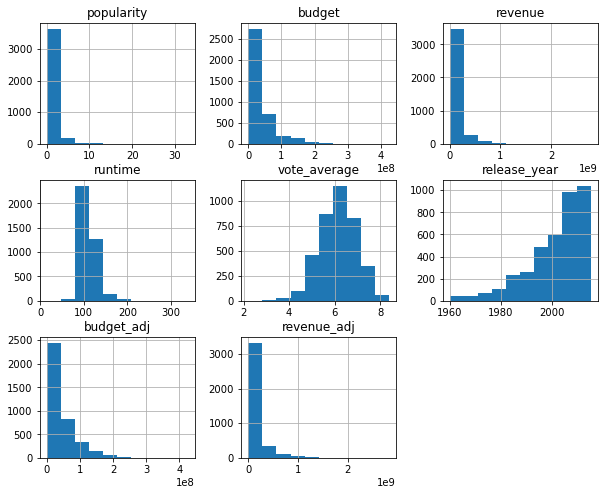

In [105]:
df.hist(figsize=(10,8))  # getting to asses the each data using histogram plots

In [ ]:
years = []
popular_genres = []
high_profit_movies = []
low_profit_movies = []
high_profits = []
low_profits = []
high_profit_genres = []
low_profit_genres = []

for year in range(1996, 2016):
    d = df[df['release_year'] == year]
    d['profit'] = d['revenue'] - d['budget']
    
    max_popularity_index = d['popularity'].idxmax()
    max_profit_index = d['profit'].idxmax()
    min_profit_index = d['profit'].idxmin()
    
    popular_genre = df['genres'].loc[max_popularity_index]
    high_profit_movie = df['original_title'].loc[max_profit_index]
    high_profit_genre = df['genres'].loc[max_profit_index]
    low_profit_movie = df['original_title'].loc[min_profit_index]
    low_profit_genre = df['genres'].loc[min_profit_index]
    
    years.append(year)
    popular_genres.append(popular_genre)
    high_profit_movies.append(high_profit_movie)
    low_profit_movies.append(low_profit_movie)
    high_profits.append(d['profit'].max())
    low_profits.append(d['profit'].min())
    high_profit_genres.append(high_profit_genre)
    low_profit_genres.append(low_profit_genre)


### Which genres are most popular from year to year?

#### From the findings the over the past 5 years(2010-2015) the movies with Action, Adventure, Sci-Fiction genres has more popularity 

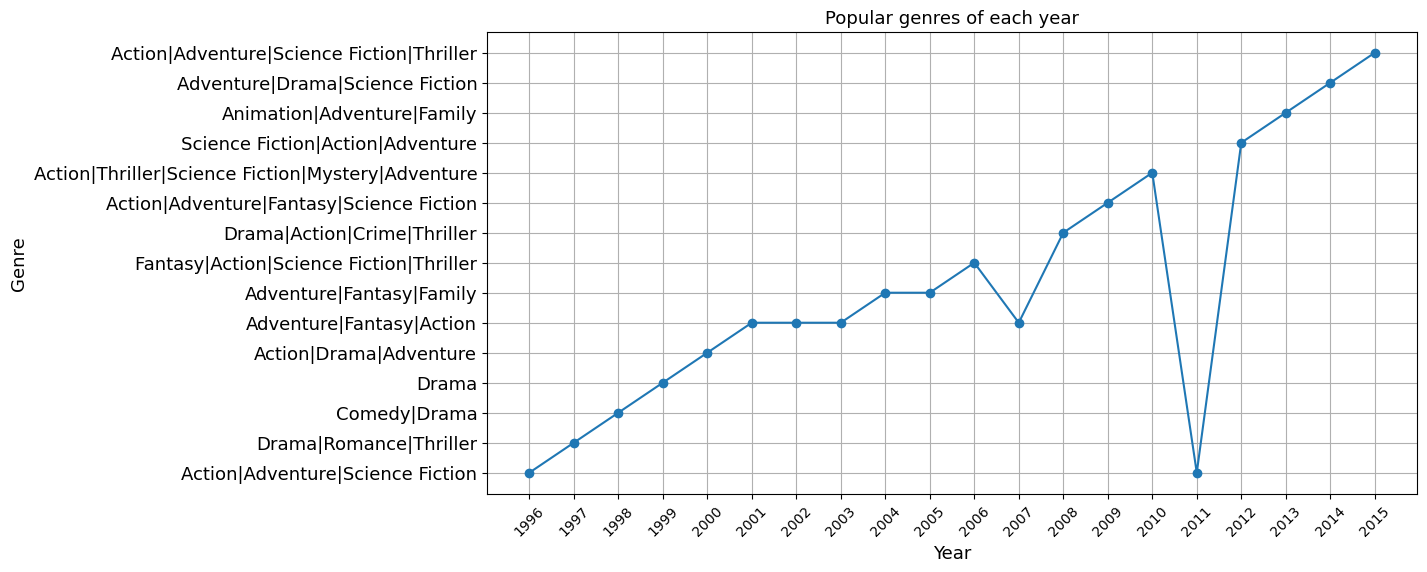

In [37]:
# Visualization of popular genres over the years
plt.figure(figsize=(12, 6))
plt.plot(years, popular_genres, marker='o')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Genre', fontsize=13)
plt.title('Popular genres of each year', fontsize=13)
plt.xticks(years, rotation=45)
plt.yticks(fontsize=13)
plt.grid(True)
plt.show()

### Which genre has the highest release of movies?

#### Based on the genres: Drama, Comedy, Thriller has the highest no of movies.

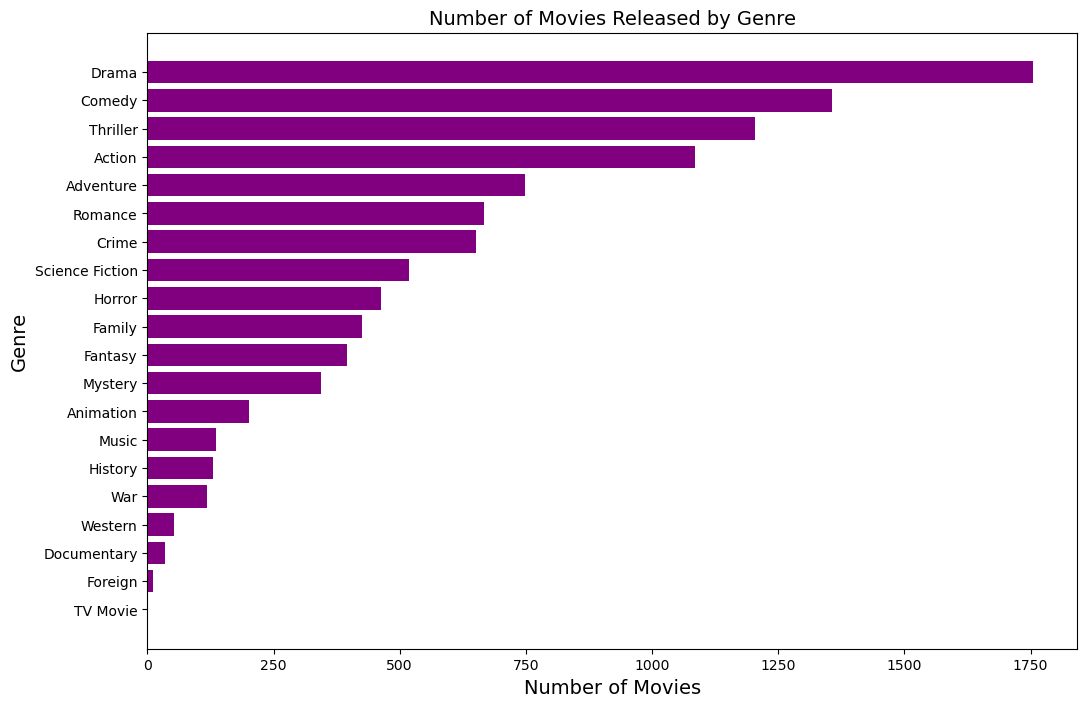

In [70]:


# Splitting genres into separate rows
df_genres = df['genres'].str.split('|').explode().reset_index()
df_genres.columns = ['index', 'genre']

# Count the number of movies for each genre
genre_counts = df_genres['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Plotting the number of movies released by genre
plt.figure(figsize=(12, 8))
plt.barh(genre_counts['genre'], genre_counts['count'], color='purple')
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.title('Number of Movies Released by Genre', fontsize=14)
plt.gca().invert_yaxis()
plt.show()


### Which movies are the most profitable to the market?

#### The three movies has most profitable markets : Avatar, Star wars, Titanic

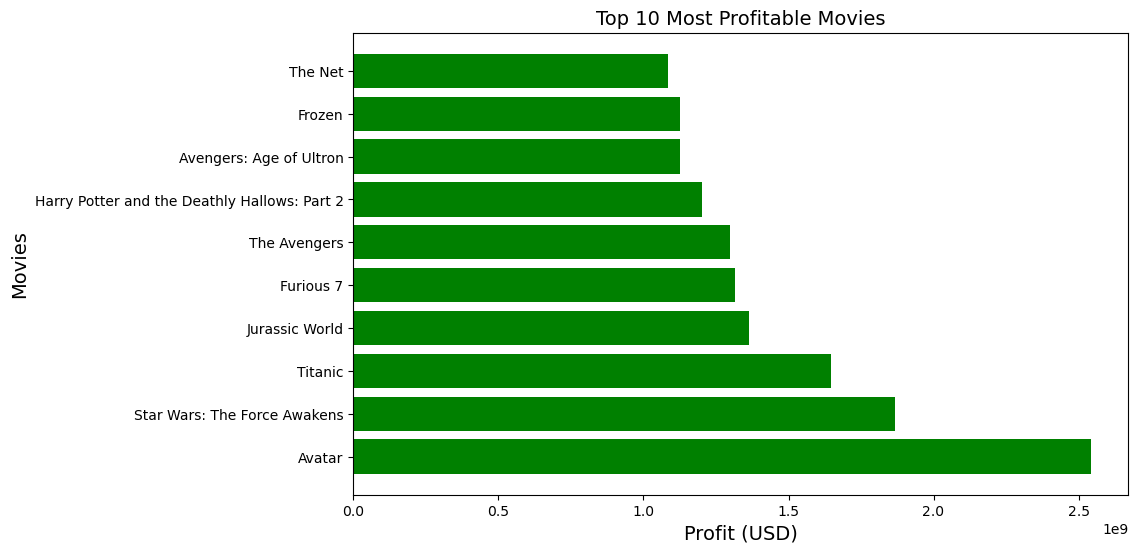

In [72]:


top_profitable_movies = df.nlargest(10, 'profit')

# Plotting the top 10 most profitable movies
plt.figure(figsize=(10, 6))
plt.barh(top_profitable_movies['original_title'], top_profitable_movies['profit'], color='green')
plt.xlabel('Profit (USD)', fontsize=14)
plt.ylabel('Movies', fontsize=14)
plt.title('Top 10 Most Profitable Movies', fontsize=14)
plt.show()


### Which movies are the least profitable to the market?

#### The three movies has least profitable markets : The Warrior way, The Lone Ranger, The Alamo

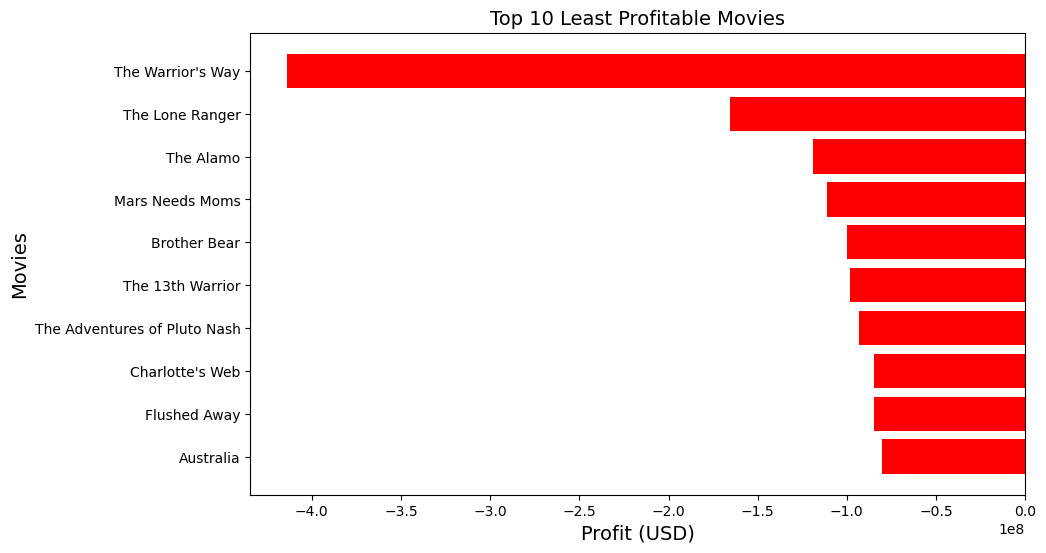

In [73]:

low_profitable_movies = df.nsmallest(10, 'profit')

plt.figure(figsize=(10, 6))
plt.barh(low_profitable_movies['original_title'], low_profitable_movies['profit'], color='Red')
plt.xlabel('Profit (USD)', fontsize=14)
plt.ylabel('Movies', fontsize=14)
plt.title('Top 10 Least Profitable Movies', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

### Which years do movies made the most profits?

#### From the Year 2010-2015 the Profitable years, but the Profits in the movies are significantly rising up

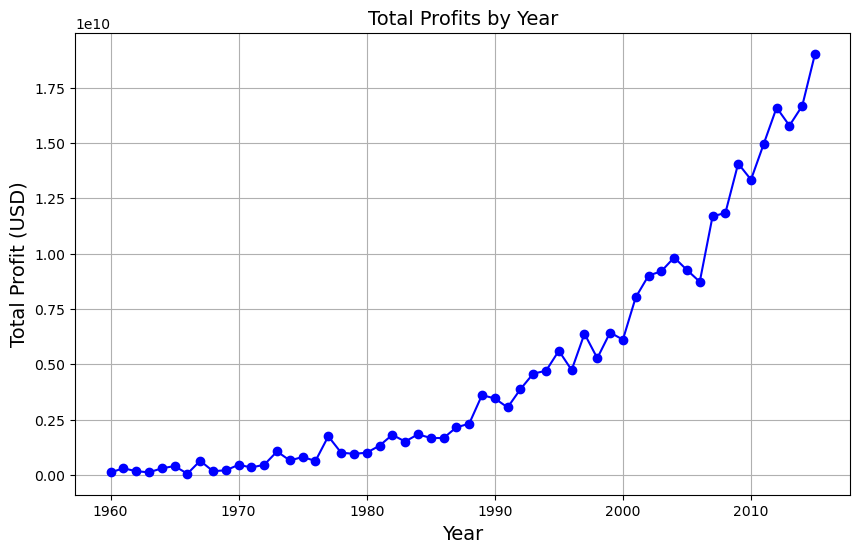

In [75]:

# Group by release year and sum the profits
profits_by_year = df.groupby('release_year')['profit'].sum().reset_index()
# Plotting the total profits by year
plt.figure(figsize=(10, 6))
plt.plot(profits_by_year['release_year'], profits_by_year['profit'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Profit (USD)', fontsize=14)
plt.title('Total Profits by Year', fontsize=14)
plt.grid(True)
plt.show()


### Does longer runtime makes the budget more?

#### Longer runtime does not consistently correlate with higher budgets.

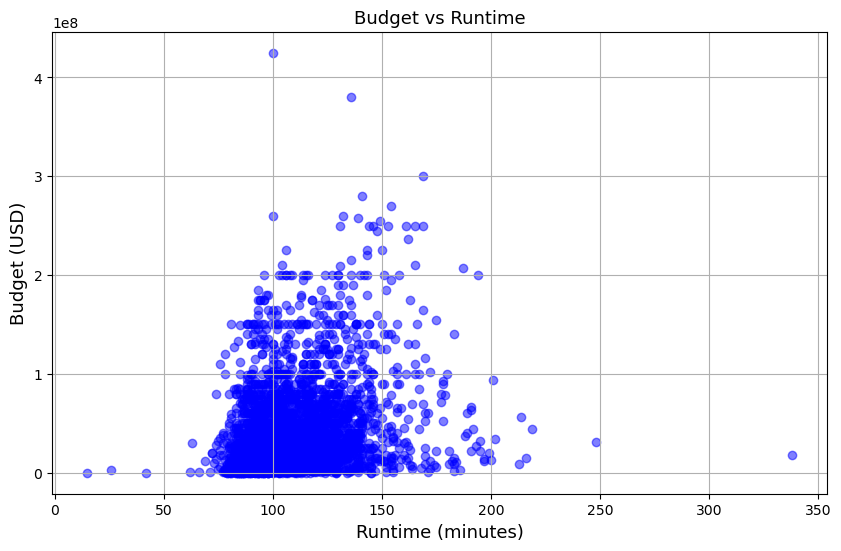

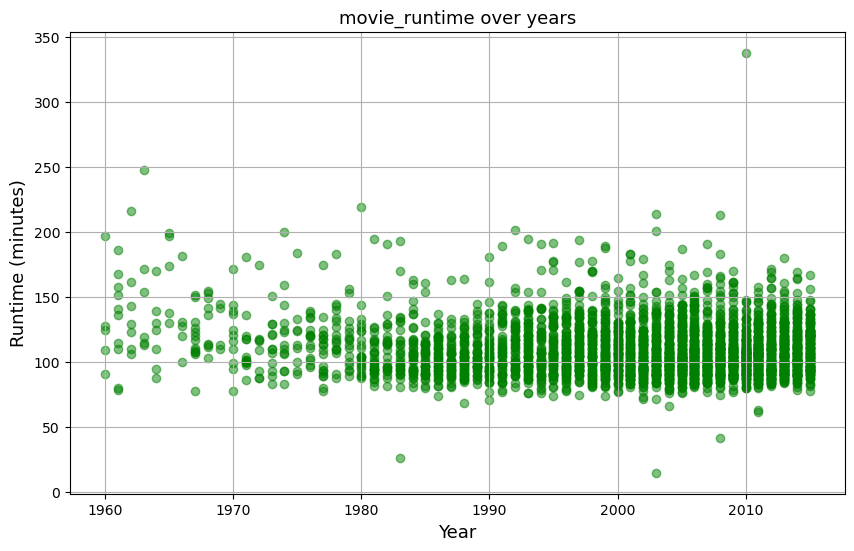

In [77]:

def scatterplot(x, y, title=None, xlabel=None, ylabel=None, size=None, color=None):
    plt.figure(figsize=size)
    plt.scatter(x, y, color=color, alpha=0.5)
    plt.title(title, fontsize=13)
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.grid(True)
    plt.show()

# Creating the scatter plot for runtime vs budget
scatterplot(df['runtime'], df['budget'], xlabel='Runtime (minutes)', ylabel='Budget (USD)', title='Budget vs Runtime', size=(10, 6), color='blue')


scatterplot(df['release_year'],df['runtime'],xlabel='Year',ylabel='Runtime (minutes)',title='movie_runtime over years',size=(10,6),color='green')


### Average Runtime Of Movies From Year To Year?

#### Mostly its decreased more than average of 40 mins over the years, Currently the average runtime would be on range 110-120 mins

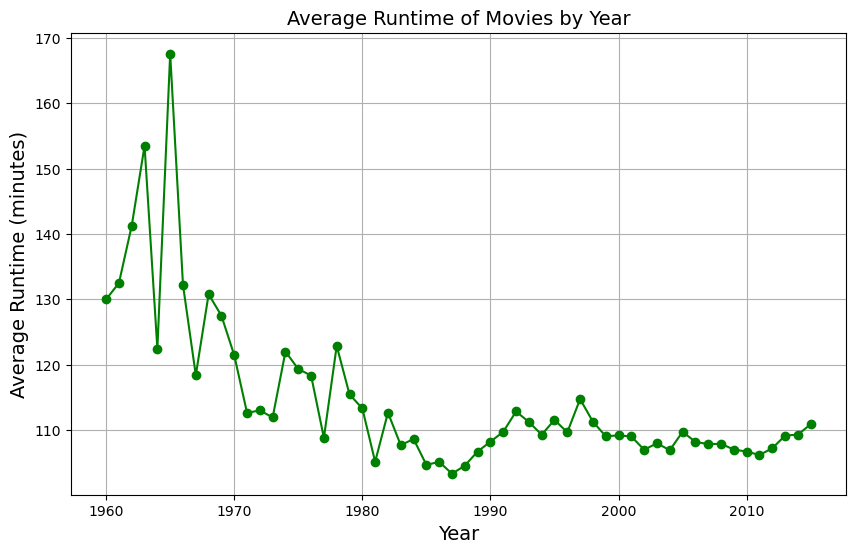

In [83]:

# Group by release year and calculate the average runtime
avg_runtime_by_year = df.groupby('release_year')['runtime'].mean().reset_index()

# Plotting the average runtime by year
plt.figure(figsize=(10, 6))
plt.plot(avg_runtime_by_year['release_year'], avg_runtime_by_year['runtime'], marker='o', linestyle='-', color='green')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Runtime (minutes)', fontsize=14)
plt.title('Average Runtime of Movies by Year', fontsize=14)
plt.grid(True)
plt.show()


### How does popularity affect the profit?

#### The over the popularity didn't benfit much from the profits as compared over the years. 

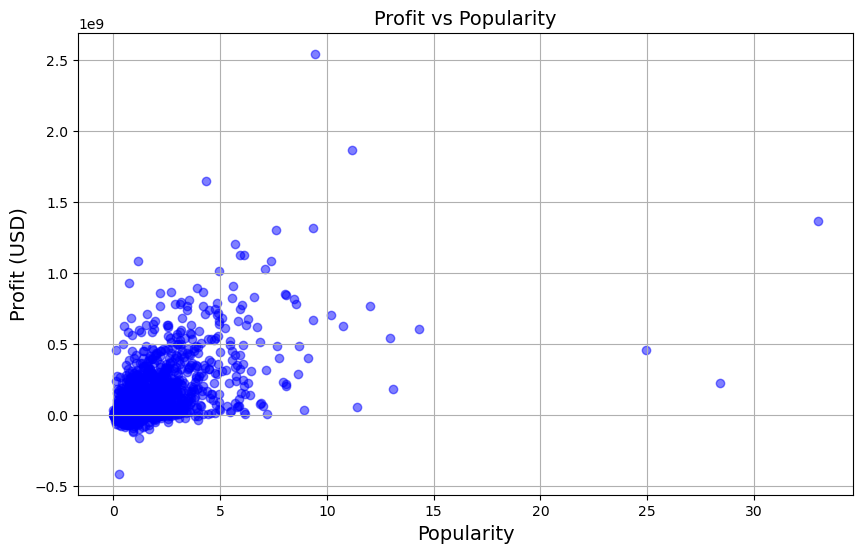

In [55]:


# Scatter plot for popularity vs profit
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['profit'], color='blue', alpha=0.5)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Profit (USD)', fontsize=14)
plt.title('Profit vs Popularity', fontsize=14)
plt.grid(True)
plt.show()

## Final Conclusion

The TMDb movie dataset offers extensive information on various movies. After performing data wrangling to eliminate null values, duplicated entries, and zero values, we ensured more accurate results. Additionally, we removed unnecessary records and created new columns, such as profit and several other variables, to facilitate more detailed analysis and improved plotting.

Using line plots, bar charts, and scatter plots, we visualized and addressed several questions. The results provided insights into top and least profitable movies, runtime trends over the years, the relationship between popularity and profits, most watched genres, and basic runtime budget costs. These findings offer valuable information on movie characteristics that attract larger audiences and the variation in movie sales over the years.

## Limitations

Despite successfully analyzing the TMDb movie dataset, several limitations exist. A significant amount of information was removed due to rows containing zero or null values, reducing the dataset by a few hundred records, which likely affected the results. Additionally, the number of votes each movie received varied greatly, and inappropriate keyword extraction led to the omission of some attributes. Consequently, movies with fewer or more votes may not be accurately represented. To enhance the analysis, a consistent method for data collection is essential to ensure comprehensive and useful information.